In [240]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
class geracoes:
    def __init__(self):
        
        self.conexao = sql3.connect('../../database/Pokemon.db')
        self.cursor = self.conexao.cursor()
        self.geracoes= self.cursor.execute('SELECT count(id) FROM generation;').fetchone()[0]
        self.dados=pd.read_sql('SELECT * FROM pokemon;',self.conexao)
    def gens(self):
        qtd=self.cursor.execute(f"SELECT COUNT(*) FROM pokemon").fetchone()[0]
        json = {}
        gens=pd.read_sql('SELECT * FROM generation;',self.conexao)
        for _,x in gens.iterrows():
            linha = self.cursor.execute(f"SELECT COUNT(*) FROM pokemon WHERE Generation = {x['id']}").fetchone()[0]

            if linha:  # Verifica se há algum resultado
                # Calculate the percentage of Pokémon in this generation
                porcentagem = (linha / qtd) * 100
                json[x['Generation']]=porcentagem

        return json
    def lendarios(self):
        qtd = self.cursor.execute('SELECT COUNT(*) FROM pokemon WHERE Legendary == TRUE;').fetchone()[0]  # Fetch count value properly
        json = {}
        pokemon=pd.read_sql('SELECT * FROM generation;',self.conexao)
        for _,x in pokemon.iterrows():
            linha = self.cursor.execute(f"SELECT COUNT(*) LENGENDARYS FROM pokemon WHERE Generation=={x['id']} and Legendary==TRUE").fetchone()[0]
            if linha:  # Verifica se há algum resultado
                # Calcula a porcentagem do valor POKEMONS
                porcentagem = (linha / qtd) * 100
                json[x['Generation']]=porcentagem
        return json
    def megas(self):
        variacoes=pd.read_sql('SELECT original FROM Mega;',self.conexao)
        df = pd.DataFrame({"gen": [1]})
        linha=0
        for x in variacoes['original']:
            df.loc[linha] = self.dados.loc[self.dados['id'] == x, 'Generation'].iloc[0]
            linha+=1
        json={}
        geracao=pd.read_sql('SELECT * FROM generation;',self.conexao)
        for x in df['gen'].unique():
            tamanho=len(df.loc[df['gen']==x])
            nome=geracao[geracao['id']==x]['Generation'].iloc[0]
            json[nome]=tamanho
        return json
    def lends_per_generation_number(self):
        json = {}
        gens=pd.read_sql('SELECT * FROM generation;',self.conexao)
        for _,x in gens.iterrows():
            consulta=self.cursor.execute(f"SELECT count(*) FROM pokemon WHERE Generation=={x['id']} AND Legendary=1;").fetchone()[0]
            json[x['Generation']]=consulta
            
            
        return json

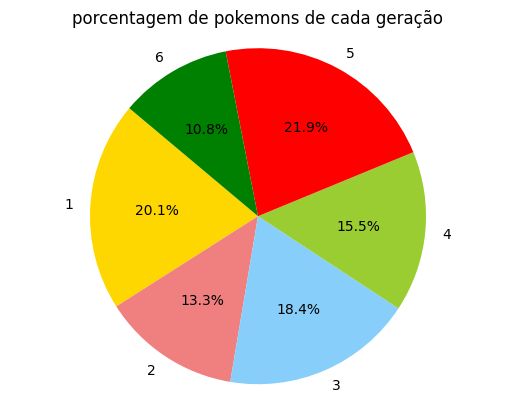

In [242]:
geracao=geracoes()
json=geracao.gens()
labels = json.keys()
sizes = json.values()  # Porcentagens
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen','red','green']  # Cores para cada fatia

# Criando o gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('porcentagem de pokemons de cada geração')
# Igualando o aspecto do gráfico para que ele fique redondo
plt.axis('equal')

# Exibindo o gráfico
plt.show()

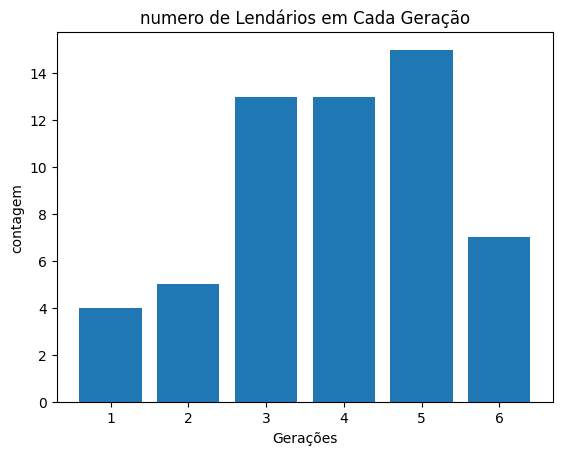

In [243]:
geracao = geracoes()

numero=geracao.lends_per_generation_number()

valores = numero.values()
# Gerar as categorias (nomes das gerações)
categorias = numero.keys()

# Criar gráfico de barras
plt.bar(categorias, valores)

# Adicionar título e rótulos aos eixos
plt.title('numero de Lendários em Cada Geração')
plt.xlabel('Gerações')
plt.ylabel('contagem')

# Mostrar o gráfico
plt.show()

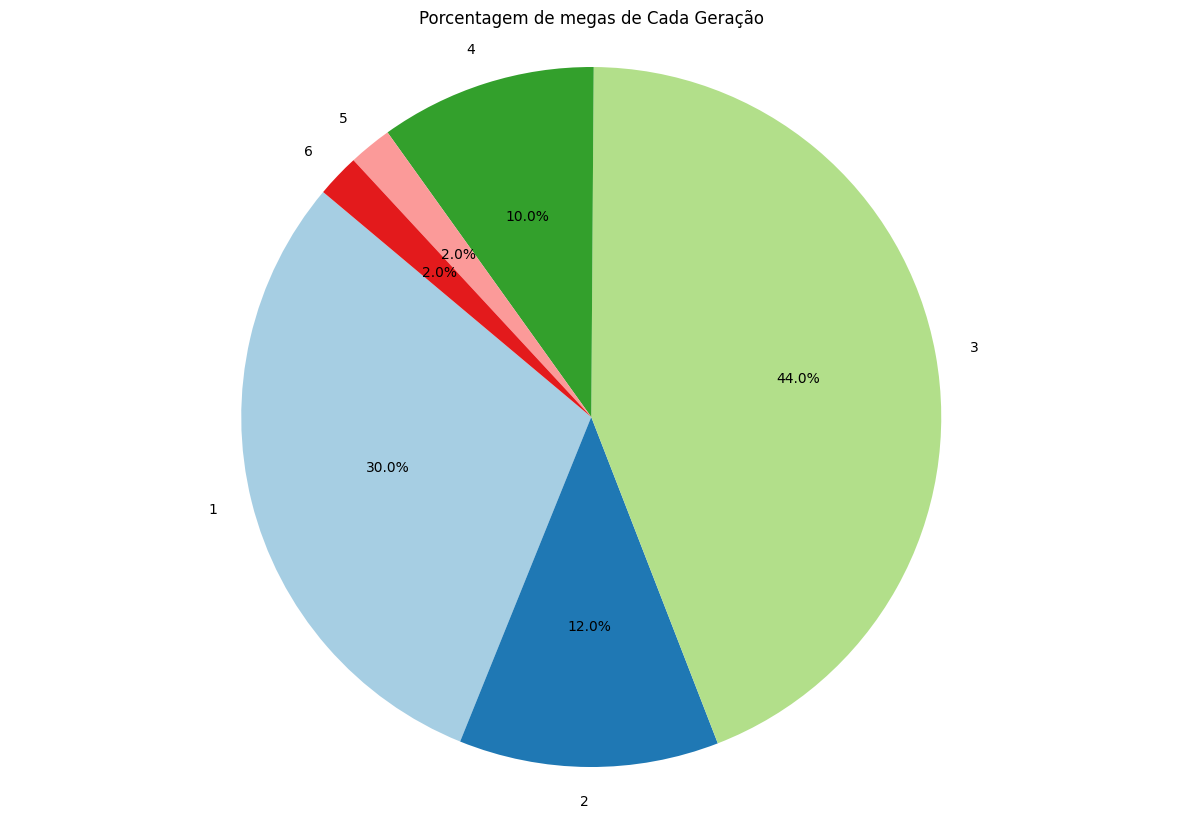

In [244]:
geracao = geracoes()

# Obter os dados para o gráfico
consulta = geracao.megas()

# Gerar as categorias (nomes das gerações) e os valores
categorias = list(consulta.keys())  # Nomes das gerações
valores = list(consulta.values())  # Quantidade de pokémons por geração

# Calcular as porcentagens
sizes = [float(x / sum(valores)) for x in valores]

# Definir cores para as fatias
colors = plt.cm.Paired(range(len(categorias)))
plt.figure(figsize=(15, 10))
plt.title('Porcentagem de megas de Cada Geração')  # Aumenta o tamanho da fonte do título
plt.pie(sizes, labels=categorias, colors=colors, autopct='%1.1f%%', startangle=140)

# Igualando o aspecto do gráfico para que ele fique redondo
plt.axis('equal')

# Exibindo o gráfico
plt.show()
